In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
matches=pd.read_csv(r"C:\Users\shata\OneDrive\Desktop\puthon\matches.csv")
deliveries=pd.read_csv(r"C:\Users\shata\OneDrive\Desktop\puthon\deliveries.csv")

In [3]:
matches.sample(5)

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
657,1136582,2018,Delhi,23-04-2018,League,AS Rajpoot,Arun Jaitley Stadium,Kings XI Punjab,Delhi Daredevils,Delhi Daredevils,field,Kings XI Punjab,runs,4.0,144.0,20.0,N,NaN,A Nand Kishore,CK Nandan
55,336038,2007/08,Mumbai,30-05-2008,Semi Final,SR Watson,Wankhede Stadium,Delhi Daredevils,Rajasthan Royals,Delhi Daredevils,field,Rajasthan Royals,runs,105.0,193.0,20.0,N,NaN,BF Bowden,RE Koertzen
643,1136568,2018,Bengaluru,13-04-2018,League,UT Yadav,M.Chinnaswamy Stadium,Kings XI Punjab,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,4.0,156.0,20.0,N,NaN,A Deshmukh,S Ravi
828,1254070,2021,Chennai,20-04-2021,League,A Mishra,"MA Chidambaram Stadium, Chepauk, Chennai",Mumbai Indians,Delhi Capitals,Mumbai Indians,bat,Delhi Capitals,wickets,6.0,138.0,20.0,N,NaN,C Shamshuddin,CB Gaffaney
999,1359524,2023,Delhi,06-05-2023,League,PD Salt,"Arun Jaitley Stadium, Delhi",Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,Delhi Capitals,wickets,7.0,182.0,20.0,N,NaN,RJ Tucker,YC Barde


In [4]:
deliveries.sample(5)

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
61202,548317,1,Mumbai Indians,Rajasthan Royals,9,6,AT Rayudu,AA Chavan,KA Pollard,2,0,2,NaN,0,NaN,NaN,NaN
186817,1216524,1,Sunrisers Hyderabad,Delhi Capitals,0,6,WP Saha,A Nortje,DA Warner,0,0,0,NaN,0,NaN,NaN,NaN
197589,1254074,1,Mumbai Indians,Punjab Kings,12,1,SA Yadav,Arshdeep Singh,RG Sharma,0,0,0,NaN,0,NaN,NaN,NaN
70456,548357,1,Delhi Daredevils,Kolkata Knight Riders,18,1,IK Pathan,B Lee,NV Ojha,0,0,0,NaN,0,NaN,NaN,NaN
204601,1254103,2,Royal Challengers Bangalore,Rajasthan Royals,13,1,GJ Maxwell,R Tewatia,KS Bharat,1,0,1,NaN,0,NaN,NaN,NaN


In [5]:
matches.isnull().sum()

id                    0
season                0
city                 51
date                  0
match_type            0
player_of_match       5
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                5
result                0
result_margin        19
target_runs           3
target_overs          3
super_over            0
method             1074
umpire1               0
umpire2               0
dtype: int64

In [6]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [7]:
matches.drop('method',axis=1,inplace=True)

In [8]:
matches['city'] = matches['city'].fillna(matches['venue'])
matches['player_of_match'] = matches['player_of_match'].fillna('unknown')
matches['winner'] = matches['winner'].fillna('unknown')
matches['target_runs'] = matches['target_runs'].fillna(0)

In [9]:
matches['target_overs'] = matches['target_overs'].fillna(0)
matches['result_margin'] = matches['result_margin'].fillna(0)

In [10]:
matches.isnull().sum()

id                 0
season             0
city               0
date               0
match_type         0
player_of_match    0
venue              0
team1              0
team2              0
toss_winner        0
toss_decision      0
winner             0
result             0
result_margin      0
target_runs        0
target_overs       0
super_over         0
umpire1            0
umpire2            0
dtype: int64

In [11]:
print(matches.venue.nunique())
print(matches.team1.nunique())
print(matches.city.nunique())

58
19
38


In [12]:
team_dup={"Delhi Daredevils":"Delhi Capitals",
"Rising Pune Supergiants":"Rising Pune Supergiant",
"Royal Challengers Bengaluru":"Royal Challengers Bangalore",'Gujarat Lions':'Gujarat Titans','Kings XI Punjab':'Punjab Kings','Pune Warriors':'Rising Pune Supergiant','Deccan Chargers':'Sunrisers Hyderabad'}
matches.replace(to_replace=team_dup,inplace=True)

In [13]:
city_dup={'Bengaluru':'Bangalore','Navi Mumbai':'Mumbai','Dubai International Cricket Stadium':'Dubai','Sharjah Cricket Stadium':'Sharjah'}
matches['city'].replace(to_replace=city_dup,inplace=True)

C:\Users\shata\AppData\Local\Temp\ipykernel_9120\11222071.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  matches['city'].replace(to_replace=city_dup,inplace=True)


In [14]:
matches.replace('Arun Jaitley Stadium, Delhi','Arun Jaitley Stadium',inplace=True)
matches.replace('Brabourne Stadium, Mumbai','Brabourne Stadium',inplace=True)
matches.replace('Dr DY Patil Sports Academy, Mumbai','Dr DY Patil Sports Academy',inplace=True)
matches.replace('Eden Gardens, Kolkata','Eden Gardens',inplace=True)
matches.replace('Wankhede Stadium, Mumbai','Wankhede Stadium',inplace=True)

In [15]:
matches.replace('Sawai Mansingh Stadium, Jaipur','Sawai Mansingh Stadium',inplace=True)
matches.replace('Zayed Cricket Stadium, Abu Dhabi','Sheikh Zayed Stadium',inplace=True)
matches.replace('MA Chidambaram Stadium, Chepauk','MA Chidambaram Stadium',inplace=True)
matches.replace('MA Chidambaram Stadium, Chepauk, Chennai, Chepauk','MA Chidambaram Stadium',inplace=True)
matches.replace('Maharashtra Cricket Association Stadium, Pune','Maharashtra Cricket Association Stadium',inplace=True)
matches.replace('Subrata Roy Sahara Stadium','Maharashtra Cricket Association Stadium',inplace=True)
matches.replace('M.Chinnaswamy Stadium','M Chinnaswamy Stadium',inplace=True)

In [16]:
matches.replace('Punjab Cricket Association Stadium, Mohali','Punjab Cricket Association Stadium',inplace=True)
matches.replace('Punjab Cricket Association IS Bindra Stadium, Mohali','Punjab Cricket Association Stadium',inplace=True)
matches.replace('Punjab Cricket Association IS Bindra Stadium, Mohali, Chandigarh','Punjab Cricket Association Stadium',inplace=True)
matches.replace('M Chinnaswamy Stadium, Bengaluru','M Chinnaswamy Stadium',inplace=True)
matches.replace('Rajiv Gandhi International Stadium, Uppal','Rajiv Gandhi International Stadium',inplace=True)
matches.replace('Rajiv Gandhi International Stadium, Uppal, Hyderabad','Rajiv Gandhi International Stadium',inplace=True)
matches.replace('Himachal Pradesh Cricket Association Stadium, Dharamsala','Himachal Pradesh Cricket Association Stadium',inplace=True)
matches.replace('Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium, Visakhapatnam','Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',inplace=True)

In [17]:
print(matches.venue.nunique())
print(matches.team1.nunique())
print(matches.city.nunique())

40
12
34


In [18]:
#**HANDLING DUPLICATES IN DELIVERIES**

In [19]:
deliveries.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batter                   0
bowler                   0
non_striker              0
batsman_runs             0
extra_runs               0
total_runs               0
extras_type         246795
is_wicket                0
player_dismissed    247970
dismissal_kind      247970
fielder             251566
dtype: int64

In [20]:
team_dup={"Delhi Daredevils":"Delhi Capitals",
"Rising Pune Supergiants":"Rising Pune Supergiant",
"Royal Challengers Bengaluru":"Royal Challengers Bangalore",'Gujarat Lions':'Gujarat Titans'}
deliveries.replace(to_replace=team_dup,inplace=True)

In [21]:
#**SOME INSIGHTS**

In [22]:
#BEST BATTER AND BOWLER OF THE YEAR

In [23]:
# Merged data
merged_data = deliveries.merge(matches, left_on='match_id', right_on='id')

def analyze_yearly_performance(selected_year):
    # Filter data for the specified year
    yearly_data = merged_data[merged_data['season'] == selected_year]
    print(f"Data filtered for year: {selected_year}")
    return yearly_data


In [24]:
def find_top_batter(yearly_data):
    batter_stats = yearly_data.groupby('batter')['batsman_runs'].sum().reset_index()
    sorted_batters = batter_stats.sort_values(by='batsman_runs', ascending=False)
    top_batter = sorted_batters.head(1)
    print("Top Batter:")
    print(top_batter)
    return top_batter


In [25]:
def find_top_bowler(yearly_data):
    bowler_performance = yearly_data[['match_id', 'bowler', 'is_wicket', 'total_runs']].groupby(['match_id', 'bowler']).agg(
        wickets=('is_wicket', 'sum'),
        runs_conceded=('total_runs', 'sum')
    ).reset_index()

    bowler_stats = bowler_performance.groupby('bowler')['wickets'].sum().reset_index()
    sorted_bowlers = bowler_stats.sort_values(by="wickets", ascending=False)
    top_bowler = sorted_bowlers.head(1)
    print("Top Bowler:")
    print(top_bowler)
    return top_bowler


In [26]:
def find_highest_strike_rate(yearly_data):
    batter_performance = yearly_data[['batter', 'batsman_runs']]
    total_runs = batter_performance.groupby('batter')['batsman_runs'].sum().reset_index()
    total_runs.rename(columns={'batsman_runs': 'total_runs'}, inplace=True)

    # Filter out wides to count balls faced
    valid_balls = deliveries[deliveries['extras_type'] != 'wides']
    balls_faced = valid_balls.groupby('batter').size().reset_index(name='balls_faced')

    # Merge runs and balls faced
    strike_rate_stats = pd.merge(total_runs, balls_faced, on='batter')
    strike_rate_stats['strike_rate'] = (strike_rate_stats['total_runs'] / strike_rate_stats['balls_faced']) * 100

    # Sort by strike rate
    top_strike_rate = strike_rate_stats.sort_values(by='strike_rate', ascending=False).head(1)
    print("Batter with Highest Strike Rate:")
    print(top_strike_rate)
    return top_strike_rate


In [27]:
def find_lowest_economy_rate(yearly_data):
    bowler_stats = yearly_data.groupby('bowler').agg(
        total_runs_conceded=('total_runs', 'sum'),
        total_balls=('ball', 'count')
    ).reset_index()

    # Calculate overs and economy rate
    bowler_stats['overs'] = bowler_stats['total_balls'] // 6
    bowler_stats = bowler_stats[bowler_stats['overs'] > 0]  # Avoid division by zero
    bowler_stats['economy_rate'] = bowler_stats['total_runs_conceded'] / bowler_stats['overs']

    # Sort by economy rate
    top_economy_bowler = bowler_stats.sort_values(by='economy_rate').head(1)
    print("Bowler with Lowest Economy Rate:")
    print(top_economy_bowler)
    return top_economy_bowler


In [28]:
def best_batter_bowler(selected_year):
    yearly_data = analyze_yearly_performance(selected_year)
    top_batter = find_top_batter(yearly_data)
    top_bowler = find_top_bowler(yearly_data)
    highest_strike_rate = find_highest_strike_rate(yearly_data)
    lowest_economy_bowler = find_lowest_economy_rate(yearly_data)

    return {
        "Top Batter": top_batter,
        "Top Bowler": top_bowler,
        "Highest Strike Rate": highest_strike_rate,
        "Lowest Economy Rate": lowest_economy_bowler
    }


In [29]:
yearly_data = analyze_yearly_performance(2023)


Data filtered for year: 2023


In [30]:
find_top_batter(yearly_data)


Top Batter:
Empty DataFrame
Columns: [batter, batsman_runs]
Index: []


,batter,batsman_runs


In [31]:
find_top_bowler(yearly_data)


Top Bowler:
Empty DataFrame
Columns: [bowler, wickets]
Index: []


,bowler,wickets


In [32]:
find_highest_strike_rate(yearly_data)


Batter with Highest Strike Rate:
Empty DataFrame
Columns: [batter, total_runs, balls_faced, strike_rate]
Index: []


,batter,total_runs,balls_faced,strike_rate


In [33]:
find_lowest_economy_rate(yearly_data)


Bowler with Lowest Economy Rate:
Empty DataFrame
Columns: [bowler, total_runs_conceded, total_balls, overs, economy_rate]
Index: []


,bowler,total_runs_conceded,total_balls,overs,economy_rate


In [34]:
best_batter_bowler(2023)


Data filtered for year: 2023
Top Batter:
Empty DataFrame
Columns: [batter, batsman_runs]
Index: []
Top Bowler:
Empty DataFrame
Columns: [bowler, wickets]
Index: []
Batter with Highest Strike Rate:
Empty DataFrame
Columns: [batter, total_runs, balls_faced, strike_rate]
Index: []
Bowler with Lowest Economy Rate:
Empty DataFrame
Columns: [bowler, total_runs_conceded, total_balls, overs, economy_rate]
Index: []


{'Top Batter': Empty DataFrame
 Columns: [batter, batsman_runs]
 Index: [],
 'Top Bowler': Empty DataFrame
 Columns: [bowler, wickets]
 Index: [],
 'Highest Strike Rate': Empty DataFrame
 Columns: [batter, total_runs, balls_faced, strike_rate]
 Index: [],
 'Lowest Economy Rate': Empty DataFrame
 Columns: [bowler, total_runs_conceded, total_balls, overs, economy_rate]
 Index: []}

In [35]:
batsman=deliveries.groupby('batter')['batsman_runs'].sum().reset_index()
sorted_batsman=batsman.sort_values(by='batsman_runs',ascending=False)
top_10_batsman=sorted_batsman.head(10)
top_10_batsman

,batter,batsman_runs
631,V Kohli,8014
512,S Dhawan,6769
477,RG Sharma,6630
147,DA Warner,6567
546,SK Raina,5536
374,MS Dhoni,5243
30,AB de Villiers,5181
124,CH Gayle,4997
501,RV Uthappa,4954
282,KD Karthik,4843


Text(0, 0.5, 'scores')

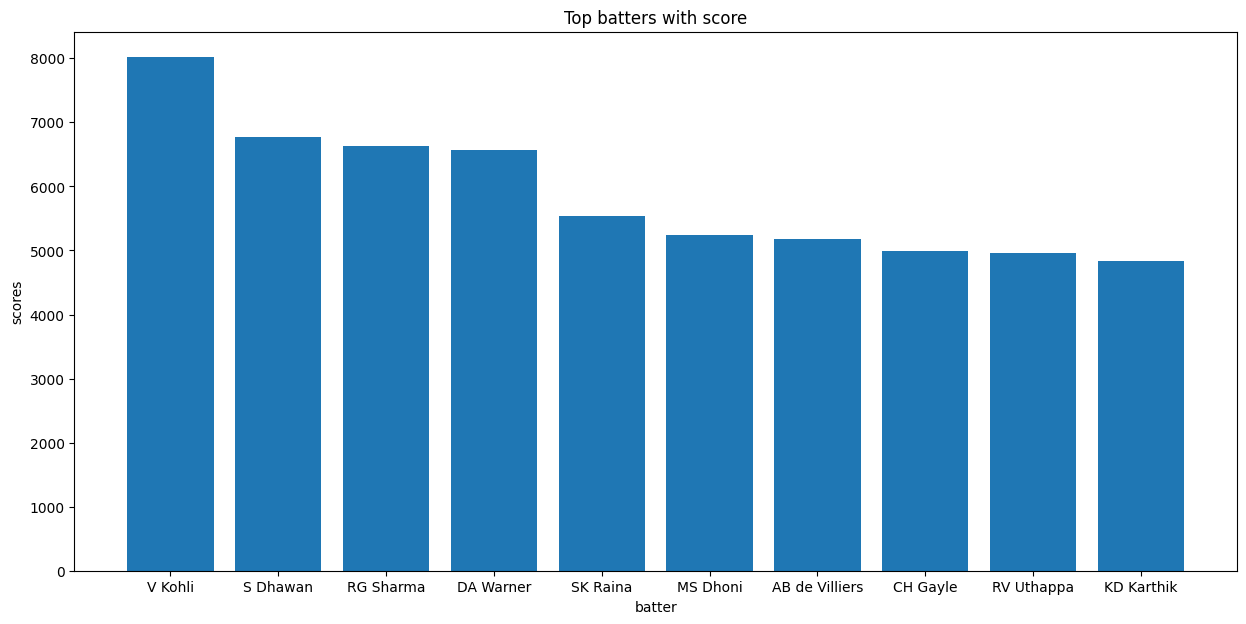

In [36]:
player=top_10_batsman['batter']
scores=top_10_batsman['batsman_runs']
fig = plt.figure(figsize = (15,7))
plt.bar(player,scores)
plt.title('Top batters with score')
plt.xlabel('batter')
plt.ylabel('scores')

In [37]:
bowler_data = deliveries[['match_id', 'bowler', 'is_wicket', 'total_runs']]
performance = bowler_data.groupby(['match_id', 'bowler']).agg(
    wickets=('is_wicket', 'sum'),
    runs_conceded=('total_runs', 'sum')
).reset_index()

In [38]:
bowlers=performance.groupby('bowler')['wickets'].sum().reset_index()
top_bowl=bowlers.sort_values(by="wickets",ascending=False)
top_bowlers=top_bowl.head(10)
top_bowlers

,bowler,wickets
524,YS Chahal,213
119,DJ Bravo,207
348,PP Chawla,201
446,SP Narine,200
355,R Ashwin,198
71,B Kumar,195
438,SL Malinga,188
8,A Mishra,183
193,JJ Bumrah,182
373,RA Jadeja,169


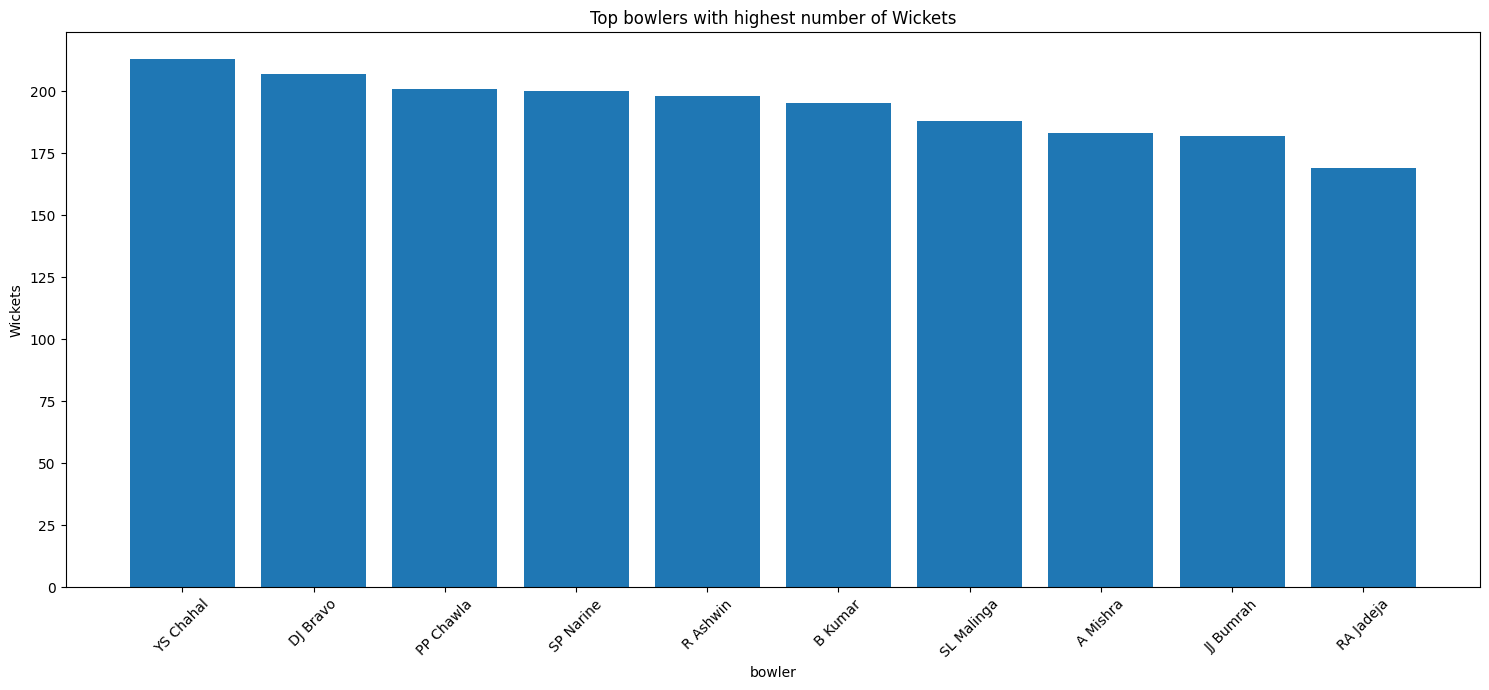

In [39]:
top_10_bowlers=top_bowlers['bowler']
wickets_scored=top_bowlers['wickets']
fig = plt.figure(figsize = (15,7))
plt.bar(top_10_bowlers,wickets_scored)
plt.title('Top bowlers with highest number of Wickets')
plt.xlabel('bowler')
plt.ylabel('Wickets')
plt.xticks(rotation=45)
plt.tight_layout()

In [40]:
#**PLAYER LEVEL ANALYSIS**



In [41]:
#TOP 10 BATSMAN STRIKE RATE ANALYSIS

In [42]:
batsman_data = deliveries[['batter', 'batsman_runs']]
runs = batsman_data.groupby('batter')['batsman_runs'].sum().reset_index()
runs.rename(columns={'batsman_runs': 'total_runs'}, inplace=True)
balls_faced = deliveries[deliveries['extras_type'] != 'wides'].groupby('batter').size().reset_index(name='balls_faced')
batsman_stats = pd.merge(runs, balls_faced, on='batter')
batsman_stats['strike_rate'] = (batsman_stats['total_runs'] / batsman_stats['balls_faced']) * 100
top_10_batsmen = batsman_stats.sort_values(by='strike_rate', ascending=False).head(10)
print(top_10_batsmen)

              batter  total_runs  balls_faced  strike_rate
312           L Wood           9            3   300.000000
97        B Stanlake           5            2   250.000000
234  J Fraser-McGurk         330          141   234.042553
461    R Sai Kishore          13            6   216.666667
629         Umar Gul          39           19   205.263158
497         RS Sodhi           4            2   200.000000
465       R Shepherd         115           63   182.539683
410       Naman Dhir         140           79   177.215190
318        LJ Wright         106           60   176.666667
583    Shahid Afridi          81           46   176.086957


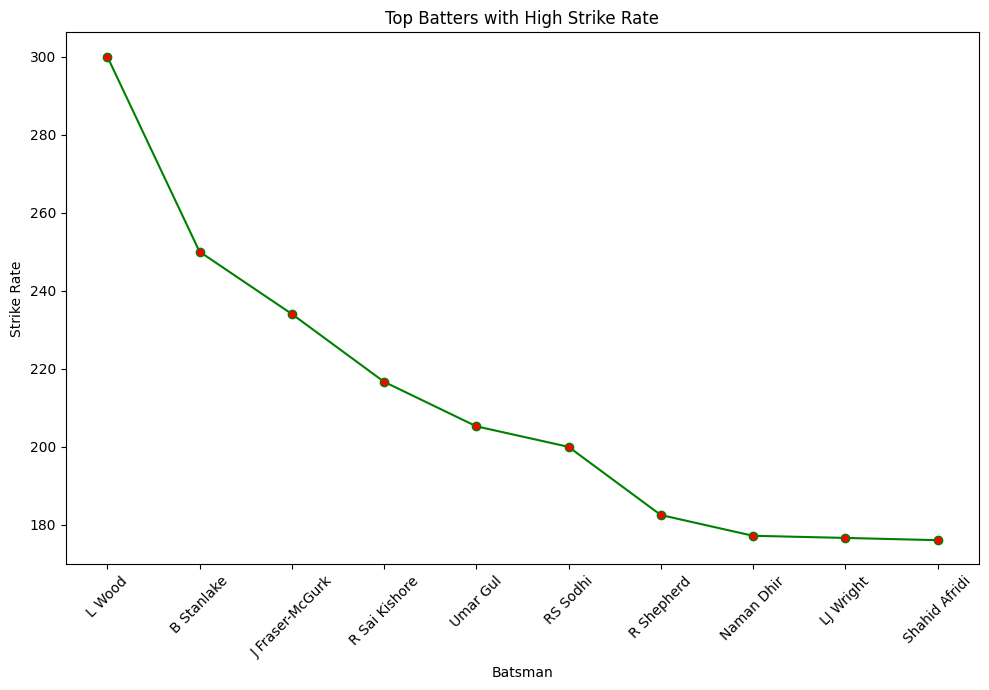

In [43]:
top_batter_strike=top_10_batsmen['batter']
strike_rate=top_10_batsmen['strike_rate']
fig=plt.figure(figsize=(10,7))
plt.plot(top_batter_strike, strike_rate,marker='o',mfc = 'r', color='green', linestyle='-')
plt.title("Top Batters with High Strike Rate")
plt.xlabel("Batsman")
plt.ylabel("Strike Rate")
plt.xticks(rotation=45)
plt.tight_layout()

In [44]:
#**TOP 15 PLAYER WHO WON MAN OF MATCH**

In [45]:
man_of_match=matches.player_of_match.value_counts().reset_index()
top_15=man_of_match.head(15)
top_15

,player_of_match,count
0,AB de Villiers,25
1,CH Gayle,22
2,RG Sharma,19
3,DA Warner,18
4,V Kohli,18
5,MS Dhoni,17
6,RA Jadeja,16
7,YK Pathan,16
8,SR Watson,16
9,AD Russell,15


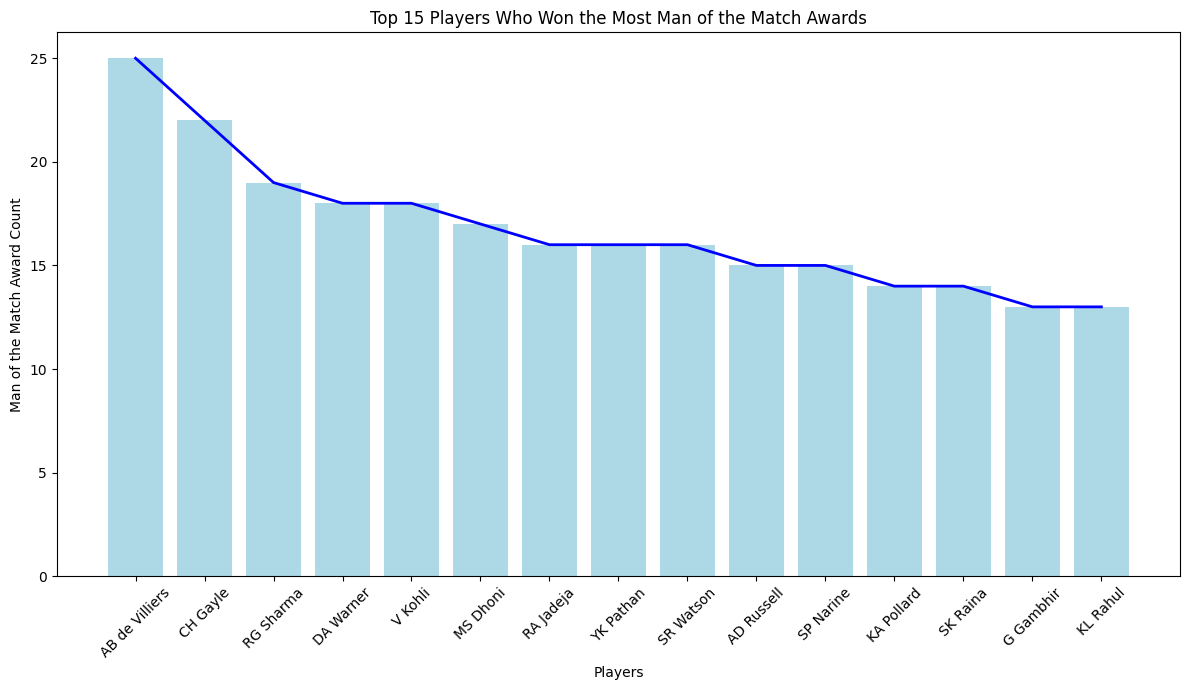

In [47]:
plt.figure(figsize=(12, 7))
bars = plt.bar(top_15["player_of_match"], top_15["count"], color='lightblue', label='Man of the Match Count')
plt.plot(top_15["player_of_match"], top_15["count"], color='blue', linestyle='-', linewidth=2, label='Trend Line')
plt.title("Top 15 Players Who Won the Most Man of the Match Awards")
plt.xlabel("Players")
plt.ylabel("Man of the Match Award Count")
plt.xticks(rotation=45)
plt.tight_layout()

In [48]:
#**Innings wise batting and bowling averages for each team**


In [49]:
def get_merged_data(deliveries, matches):
    merged = deliveries.merge(matches, left_on='match_id', right_on='id')
    print("Data successfully merged.")
    return merged


In [50]:
def calculate_batting_average(merged_data):
    batting_data = merged_data[['inning', 'batting_team', 'batsman_runs', 'is_wicket']]
    batting_summary = batting_data.groupby(['inning', 'batting_team']).agg(
        Total_Runs=('batsman_runs', 'sum'),
        Total_Outs=('is_wicket', 'sum')
    ).reset_index()
    batting_summary['Batting_Average'] = batting_summary['Total_Runs'] / batting_summary['Total_Outs']
    print("Batting average calculated.")
    return batting_summary


In [51]:
def calculate_bowling_average(merged_data):
    bowling_data = merged_data[['inning', 'bowling_team', 'batsman_runs', 'is_wicket']]
    bowling_summary = bowling_data.groupby(['inning', 'bowling_team']).agg(
        Total_Runs_Conceded=('batsman_runs', 'sum'),
        Total_Wickets=('is_wicket', 'sum')
    ).reset_index()
    bowling_summary['Bowling_Average'] = bowling_summary['Total_Runs_Conceded'] / bowling_summary['Total_Wickets']
    print("Bowling average calculated.")
    return bowling_summary


In [52]:
def plot_batting_average(batting_summary):
    plt.figure(figsize=(10, 7))
    for inning in [1, 2]:
        inning_data = batting_summary[batting_summary['inning'] == inning]
        plt.plot(inning_data['batting_team'], inning_data['Batting_Average'], marker='o', linestyle='-', label=f"Inning {inning}")

    plt.title("Batting Average for Each Team in 1st and 2nd Innings")
    plt.xlabel("Teams")
    plt.ylabel("Batting Average")
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()
    print("Batting average plot generated.")


In [53]:
def plot_bowling_average(bowling_summary):
    plt.figure(figsize=(10, 7))
    for inning in [1, 2]:
        inning_data = bowling_summary[bowling_summary['inning'] == inning]
        plt.plot(inning_data['bowling_team'], inning_data['Bowling_Average'], marker='o', linestyle='-', label=f"Inning {inning}")

    plt.title("Bowling Average for Each Team in 1st and 2nd Innings")
    plt.xlabel("Teams")
    plt.ylabel("Bowling Average")
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()
    print("Bowling average plot generated.")


In [54]:
def analyze_team_averages(deliveries, matches):
    # Step 1: Merge data
    merged_data = get_merged_data(deliveries, matches)

    # Step 2: Calculate batting and bowling averages
    batting_summary = calculate_batting_average(merged_data)
    bowling_summary = calculate_bowling_average(merged_data)

    # Step 3: Plot results
    plot_batting_average(batting_summary)
    plot_bowling_average(bowling_summary)


Data successfully merged.
Batting average calculated.
Bowling average calculated.


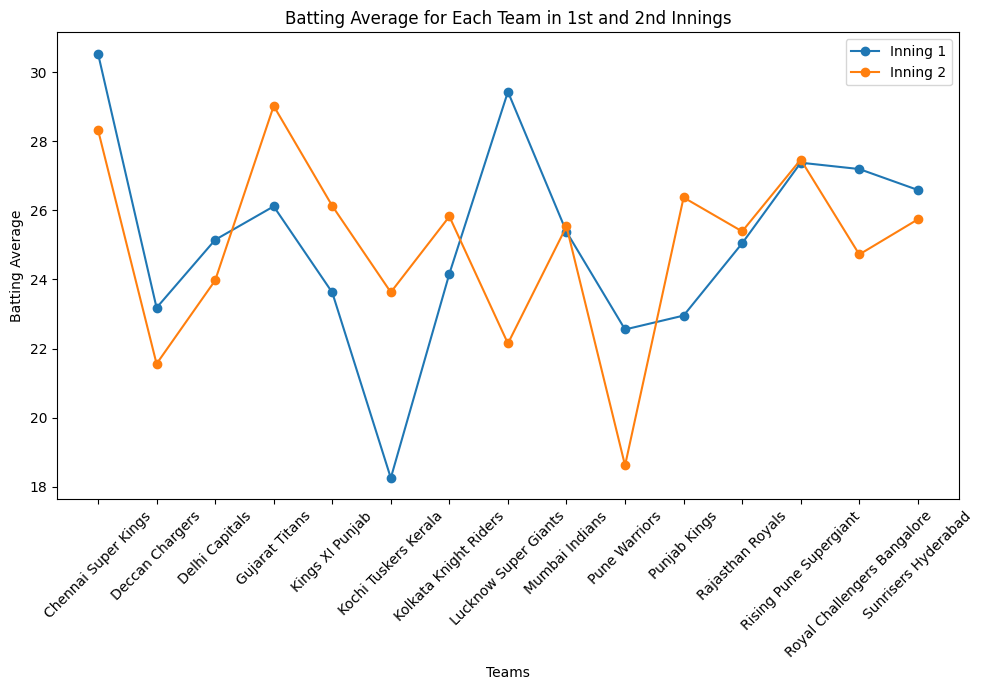

Batting average plot generated.


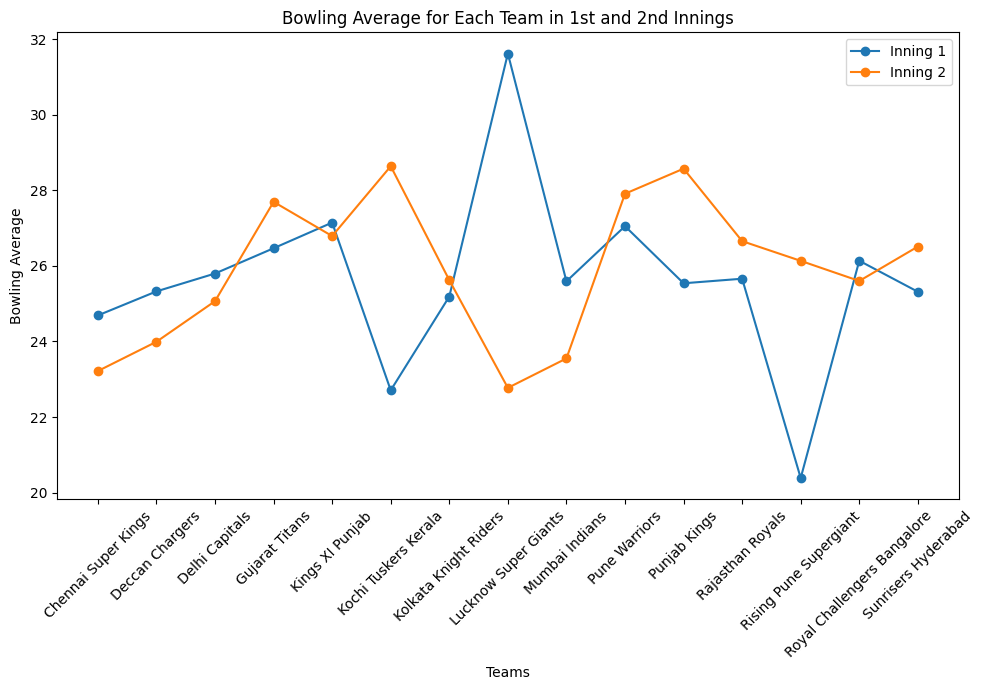

Bowling average plot generated.


In [55]:
analyze_team_averages(deliveries, matches)


In [56]:
#Merge Data
merged_data = get_merged_data(deliveries, matches)


Data successfully merged.


In [57]:
#Calculate Batting Average

In [58]:
batting_summary = calculate_batting_average(merged_data)
print(batting_summary.head())


Batting average calculated.
   inning         batting_team  Total_Runs  Total_Outs  Batting_Average
0       1  Chennai Super Kings       21038         689        30.534107
1       1      Deccan Chargers        6444         278        23.179856
2       1       Delhi Capitals       17400         692        25.144509
3       1       Gujarat Titans        5745         220        26.113636
4       1      Kings XI Punjab       14858         629        23.621622


Bowling average calculated.
   inning         bowling_team  Total_Runs_Conceded  Total_Wickets  \
0       1  Chennai Super Kings                16665            675   
1       1      Deccan Chargers                 4913            194   
2       1       Delhi Capitals                22160            859   
3       1       Gujarat Titans                 6643            251   
4       1      Kings XI Punjab                14957            551   

   Bowling_Average  
0        24.688889  
1        25.324742  
2        25.797439  
3        26.466135  
4        27.145191  


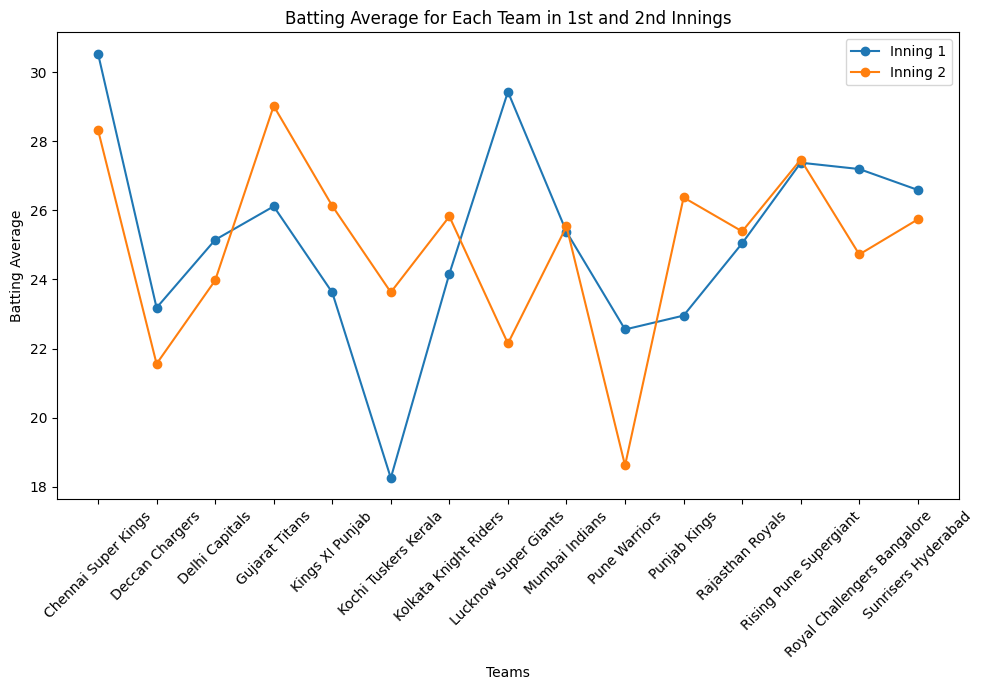

Batting average plot generated.


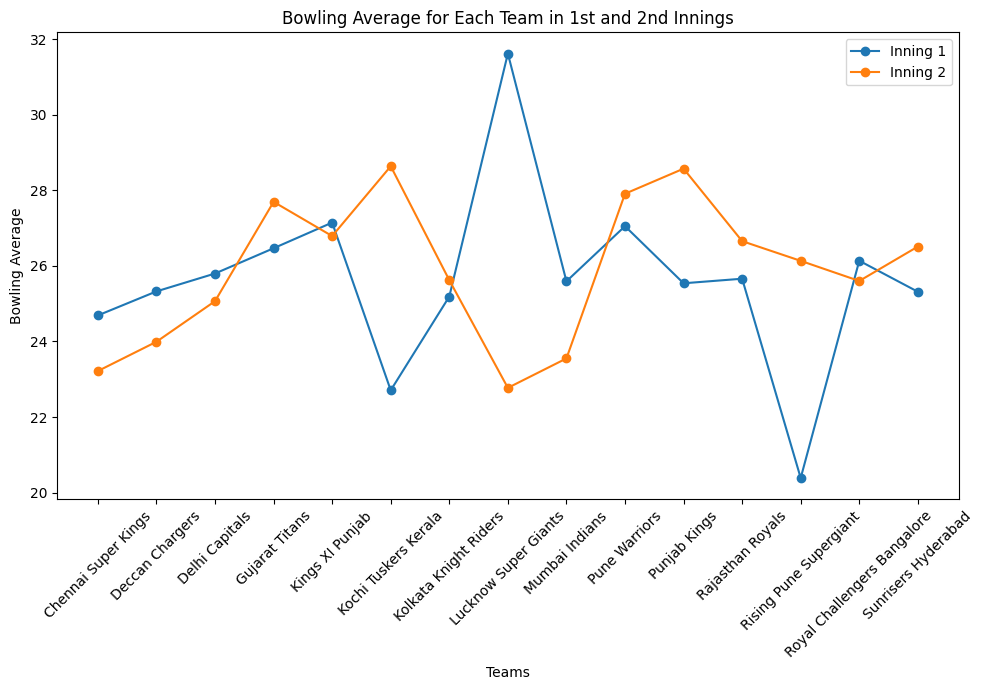

Bowling average plot generated.


In [59]:
#Calculate Bowling Average
bowling_summary = calculate_bowling_average(merged_data)
print(bowling_summary.head())
#Plot Batting Average
plot_batting_average(batting_summary)
#Plot Bowling Average
plot_bowling_average(bowling_summary)


In [60]:
#**TOP 10 BOWLERS ECONOMY RATE ANALYSIS**

In [61]:
# Step 1: Calculate Total Runs Conceded and Balls Bowled for Each Bowler
bowler_stats = deliveries.groupby('bowler').agg(
    total_runs_conceded=('total_runs', 'sum'),
    total_balls=('ball', 'count')
).reset_index()

In [62]:
# Step 2: Calculate Overs Bowled
bowler_stats['overs'] = bowler_stats['total_balls']

In [63]:
# Step 3: Filter out bowlers with zero overs to avoid division errors
bowler_stats = bowler_stats[bowler_stats['overs'] > 0]

In [64]:
# Step 4: Calculate Economy Rate
bowler_stats['economy_rate'] = bowler_stats['total_runs_conceded'] / bowler_stats['overs']

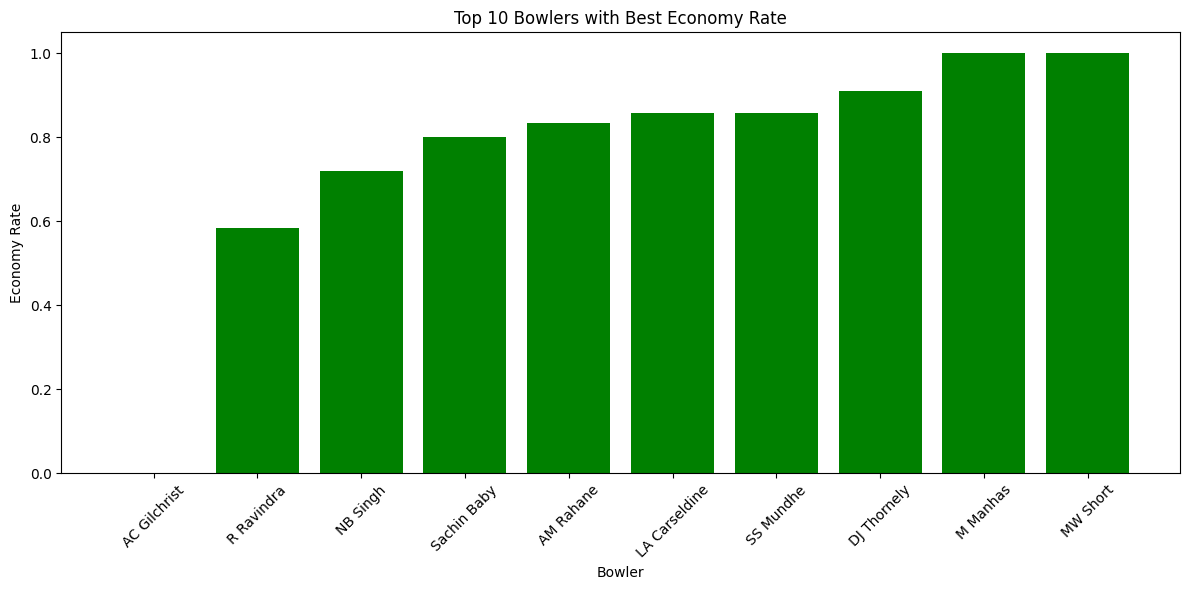

In [65]:
# Step 5: Sort and Get Top 10 Bowlers with Lowest Economy Rate
top_10_economy_bowlers = bowler_stats.sort_values(by='economy_rate').head(10)
plt.figure(figsize=(12, 6))
plt.bar(top_10_economy_bowlers['bowler'], top_10_economy_bowlers['economy_rate'], color='green')
plt.title('Top 10 Bowlers with Best Economy Rate')
plt.xlabel('Bowler')
plt.ylabel('Economy Rate')
plt.xticks(rotation=45)
plt.tight_layout()

In [66]:
#**Overall Performance by Top 10 Performers**

In [67]:
# Batting Performance
batting = deliveries.groupby('batter').agg(
    Total_Runs=('batsman_runs', 'sum'),
    Balls_Faced=('ball', 'count'),
    Dismissals=('is_wicket', 'sum')
).reset_index()
batting['Strike_Rate'] = (batting['Total_Runs'] / batting['Balls_Faced']) * 100
batting['Batting_Average'] = batting.apply(
    lambda x: x['Total_Runs'] if x['Dismissals'] == 0 else x['Total_Runs'] / x['Dismissals'], axis=1
)


In [68]:
# Bowling Performance
bowling = deliveries.groupby('bowler').agg(
    Total_Wickets=('is_wicket', 'sum'),
    Total_Runs_Conceded=('batsman_runs', 'sum'),
    Total_Balls=('ball', 'count')
).reset_index()
bowling['Overs'] = bowling['Total_Balls'] // 6
bowling['Economy_Rate'] = bowling['Total_Runs_Conceded'] / bowling['Overs']
bowling['Bowling_Average'] = bowling['Total_Runs_Conceded'] / bowling['Total_Wickets']

In [69]:
# Fielding Performance
fielding = deliveries.groupby('fielder').agg(
    Total_Catches=('is_wicket', 'sum')
).reset_index()

all_rounders = pd.merge(batting, bowling, left_on='batter', right_on='bowler', how='inner')
all_rounders = pd.merge(all_rounders, fielding, left_on='batter', right_on='fielder', how='left')


In [70]:
# Fill missing fielding stats with 0
all_rounders['Total_Catches'] = all_rounders['Total_Catches'].fillna(0)

In [71]:
# Normalize Metrics

# Normalize Batting Scores
max_batting_average = all_rounders['Batting_Average'].max()

if max_batting_average > 0:
    all_rounders['Batting_Score'] = all_rounders['Batting_Average'] / max_batting_average
else:
    all_rounders['Batting_Score'] = 0  # If no player has a valid batting average
all_rounders['Bowling_Score'] = all_rounders['Total_Wickets'] / all_rounders['Total_Wickets'].max()
all_rounders['Fielding_Score'] = all_rounders['Total_Catches'] / all_rounders['Total_Catches'].max()

In [73]:
#Weighted All-Rounder Score
all_rounders['All_Rounder_Score'] = (
    0.4 * all_rounders['Batting_Score'] +
    0.4 * all_rounders['Bowling_Score'] +
    0.2 * all_rounders['Fielding_Score']
)
top_all_rounders = all_rounders.sort_values('All_Rounder_Score', ascending=False).head(10)
print(top_all_rounders[['batter', 'All_Rounder_Score']])

            batter  All_Rounder_Score
108       DJ Bravo           0.615163
332      RA Jadeja           0.612453
159  Iqbal Abdulla           0.507408
315       R Ashwin           0.500640
396      SP Narine           0.498290
308      PP Chawla           0.494401
466      YS Chahal           0.472305
65         B Kumar           0.455961
39        AR Patel           0.452262
8         A Mishra           0.442275


In [74]:
players = top_all_rounders['batter']
run_points = top_all_rounders['Batting_Score'] * 1000  # Scaled for visualization
wicket_points = top_all_rounders['Bowling_Score'] * 1000
dismissal_points = top_all_rounders['Fielding_Score'] * 1000
overall_score = top_all_rounders['All_Rounder_Score'] * 1000
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

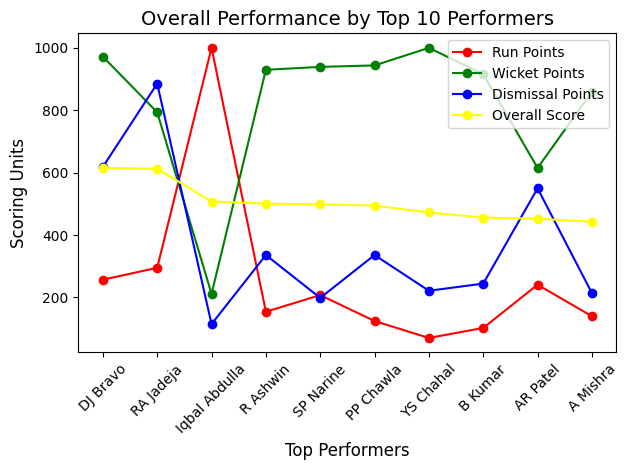

In [76]:
plt.plot(players, run_points, label="Run Points", color='red', marker='o')
plt.plot(players, wicket_points, label="Wicket Points", color='green', marker='o')
plt.plot(players, dismissal_points, label="Dismissal Points", color='blue', marker='o')
plt.plot(players, overall_score, label="Overall Score", color='yellow', marker='o')
plt.title("Overall Performance by Top 10 Performers", fontsize=14)
plt.xlabel("Top Performers", fontsize=12)
plt.ylabel("Scoring Units", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.legend()
plt.tight_layout()
plt.show()

<Axes: >

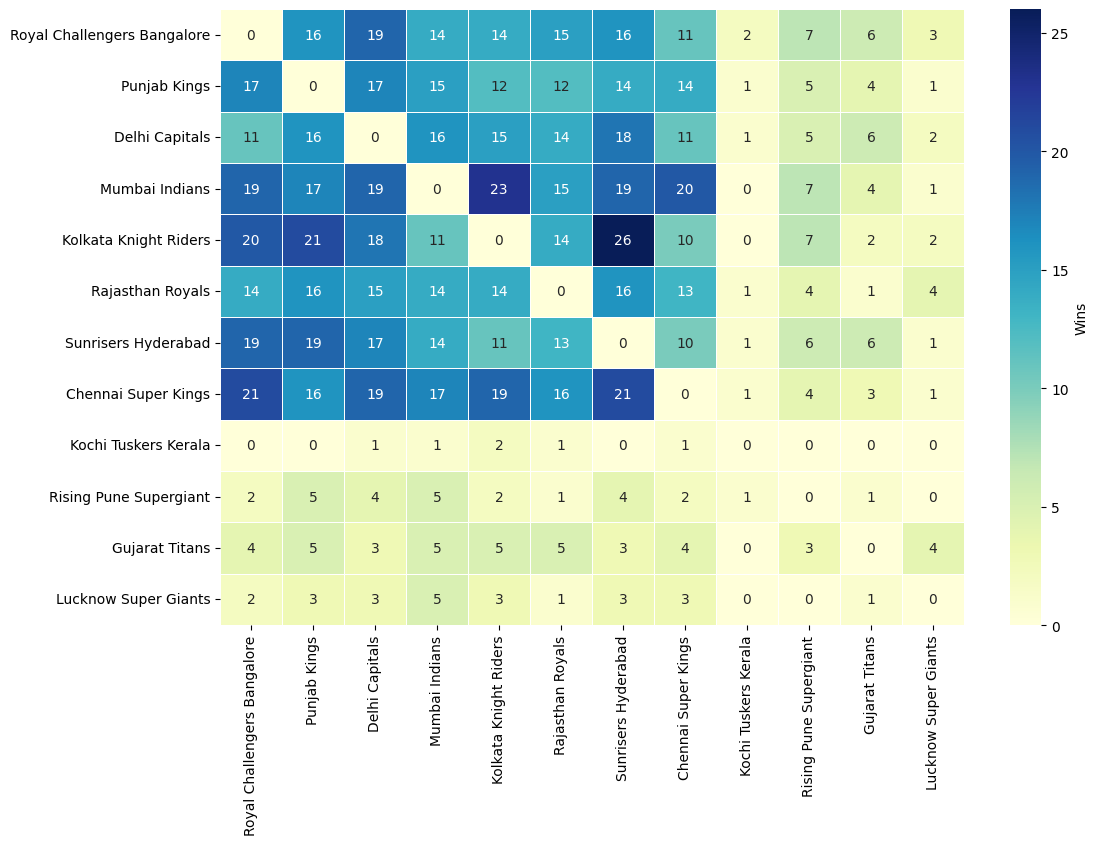

In [77]:
import seaborn as sns
teams=pd.concat([matches['team1'],matches['team2']]).unique()
head_to_head_matrix=pd.DataFrame(0,index=teams,columns=teams)
for _, row in matches.iterrows():
  winner=row['winner']
  if winner==row['team1']:
    head_to_head_matrix.loc[row['team1'],row['team2']]+=1
  elif winner==row['team2']:
    head_to_head_matrix.loc[row['team2'],row['team1']]+=1
plt.figure(figsize=(12,8))
sns.heatmap(head_to_head_matrix,annot=True,fmt='d',cmap='YlGnBu',cbar_kws={'label':'Wins'},linewidths=0.5)